In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyosrd import OSRD
OSRD.use_cases

['c1',
 'c1_with_blocks',
 'c1y2',
 'c2x2',
 'c2xx2',
 'c2y13s',
 'c2y1sy2sy1s',
 'c2y1y2',
 'c2y1y2y',
 'c2z2z2',
 'c3y1',
 'c3yy1yy3',
 'cvg_dvg',
 'point_switch',
 'station_capacity2',
 'straight_line']

[12:13:55,960] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[12:13:55,996] [INFO]              [FullInfra] parsing infra
[12:13:56,059] [INFO]              [FullInfra] adaptation to kotlin
[12:13:56,086] [INFO]              [FullInfra] loading signals
[12:13:56,091] [INFO]              [FullInfra] building blocks
[12:13:56,096] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[12:13:56,108] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[12:13:56,162] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[12:13:56,176] [INFO]  [StandaloneSimulationCommand] All simulations completed
[12:13:56,176] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


<Axes: xlabel='Time'>

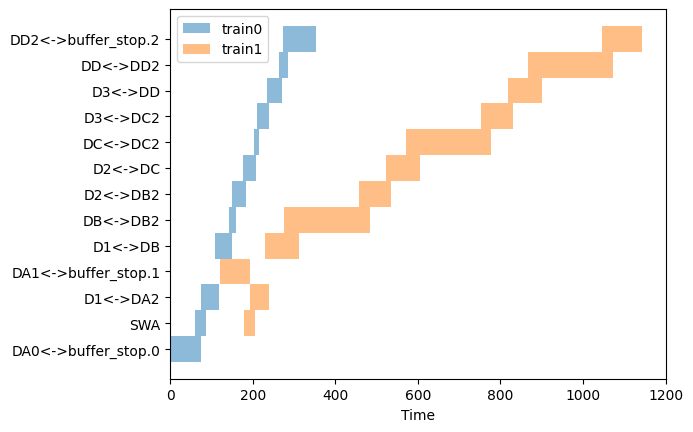

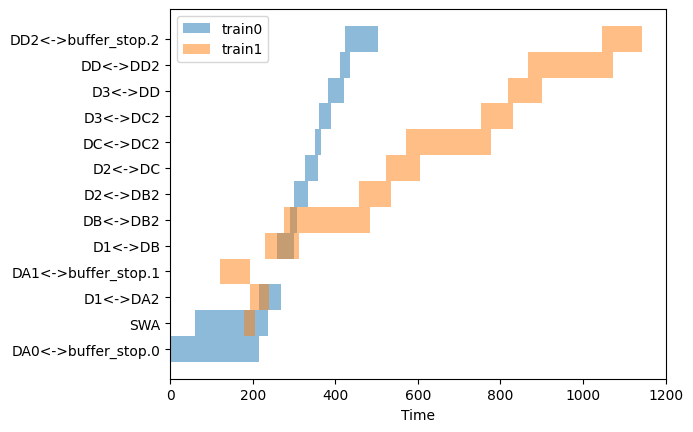

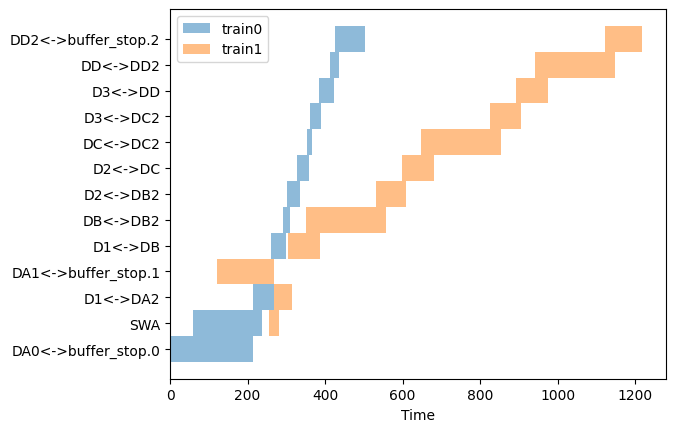

In [3]:
from pyosrd.schedules import schedule_from_osrd

use_case = 'c2y13s'
sim = OSRD(use_case=use_case, dir='tmp')

sim.reset_delays()
sim.add_delay('train0', time_threshold=70, delay=150.)
delayed = sim.delayed()

from rlway_cpagent.ortools_agent.ortools_agent import OrtoolsAgent

agent = OrtoolsAgent("cp_agent")
agent.set_schedules_from_osrd(sim)

schedule_from_osrd(sim, eco_or_base='base').plot()
schedule_from_osrd(delayed, eco_or_base='base').plot()
agent.regulated_schedule.plot()

In [4]:
OSRD.test_cases


['c1_delay', 'c1y2_2trains_conflict', 'c1y2_2trains_no_conflict']

In [8]:
import importlib
from importlib.resources import files
import pyosrd.test_cases as test_cases
from pyosrd.agents.scheduler_agent import SchedulerAgent


def launch_test_case(test_case, agent : SchedulerAgent):
    module = importlib.import_module(
                    f".{test_case}",
                    "pyosrd.test_cases"
                )
    function = getattr(module, test_case)
    sim = function()
    delayed_schedule = sim.delayed()

    agent.set_schedules_from_osrd(sim)

    delayed_schedule = schedule_from_osrd(delayed)
    sim_schedule = schedule_from_osrd(sim)

    agent.regulated_schedule.plot()

def launch_all(test_cases, agent : SchedulerAgent):
    for test_case in test_cases:
        launch_test_case(test_case, agent)

In [9]:
from rlway_cpagent.ortools_agent.ortools_agent import OrtoolsAgent

agent = OrtoolsAgent("cp_agent")
launch_all(OSRD.test_cases, agent)

ModuleNotFoundError: No module named 'rlway.pyosrd'